<a href="https://colab.research.google.com/github/vikpy/mtechdatascience_mlcourse/blob/master/lec7_decision_tree_bagging_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn import tree
from sklearn.preprocessing import scale
import graphviz 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:

carseats = pd.read_csv("/content/Carseats.csv")
carseats["High"] = carseats.Sales.map(lambda x : 'Y' if x>8 else 'N')
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No': 0, 'Yes': 1})
carseats.US = carseats.US.map({'No' : 0 , "Yes": 1})
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null object
dtypes: float64(1), int64(10), object(1)
memory usage: 37.6+ KB


In [0]:
X = carseats.drop(["Sales", "High"], axis = 1)
y = carseats.High
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200, random_state=0)

To build a tree we could use gini or entropy as split criterion at each node. Here I provide an example use 'gini'. If we change the hyperparameter, the clf score jumps around


In [4]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=8, min_samples_leaf=4)  # min_samples_leaf gives the minimum samples in the leaf nodes 
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

0.9


The most attractive feature of a tree is visualization. Here we first need to save the model file into a .dot file and graphviz Source to display 

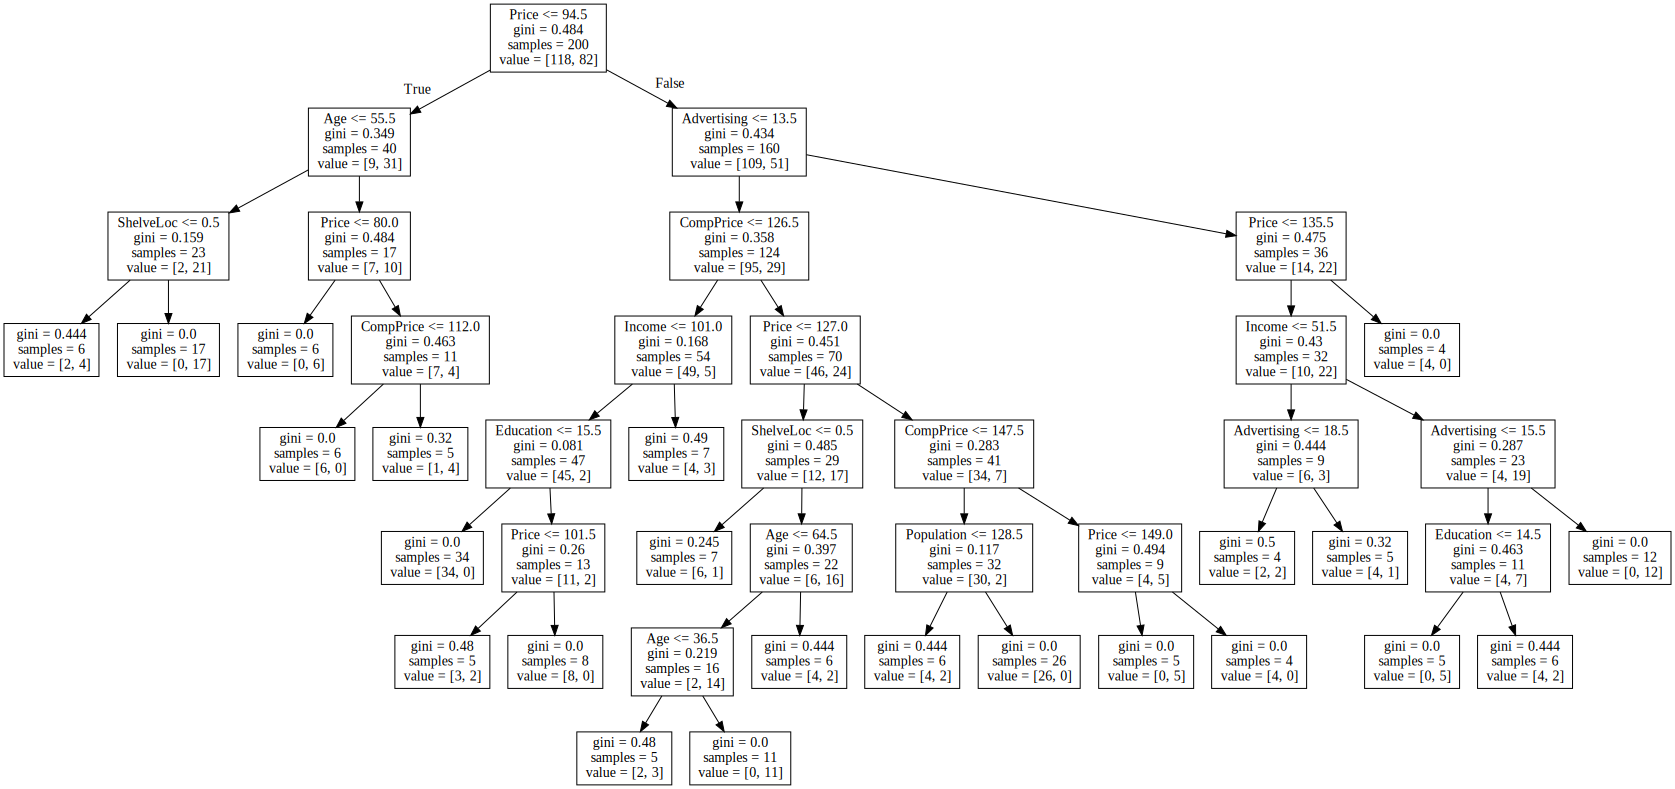

In [5]:
export_graphviz(clf_gini, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
y_pred = clf_gini.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = ["No", "Yes"], columns=["No", "Yes"])
print(cm)


[[99 19]
 [32 50]]
0.745
     No  Yes
No   99   32
Yes  19   50


In [0]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]; min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [9]:
boston = pd.read_csv("/content/Boston.csv")
X = boston.drop("medv", axis  = 1)
y = boston.medv 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 0)
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

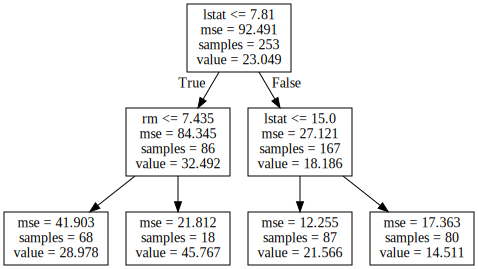

In [10]:
export_graphviz(regr_tree, out_file="mytree1.dot", feature_names=X_train.columns)
with open("mytree1.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
y_pred  =regr_tree.predict(X_test)
mean_squared_error(y_pred, y_test)


28.801544864457952

In [12]:
all_feature = X_train.shape[1]
regr_bagging = RandomForestRegressor(max_features=all_feature, random_state=1)   #Since we are using all the feaures thats why it is bagging 
regr_bagging.fit(X_train, y_train)
y_pred = regr_bagging.predict(X_test)
mean_squared_error(y_pred, y_test)

16.267629007905143

In [13]:
feature  = int(np.ceil( np.sqrt(X_train.shape[1]) ))
regr_rf = RandomForestRegressor(max_features=feature, random_state=1) # Since we are using m = root(p)
regr_rf.fit(X_train, y_train)
y_pred = regr_rf.predict(X_test)
mean_squared_error(y_pred, y_test)

15.767134932806325

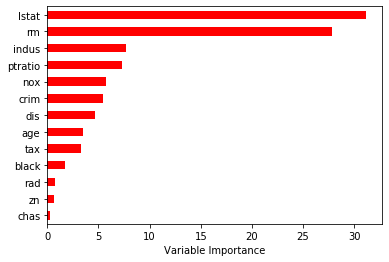

In [14]:
# Finding the feautre importance using random forest 
Importance = pd.DataFrame({"Importance" : regr_rf.feature_importances_*100}, index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

In [15]:
regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=4, random_state=3)
regr_boost.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

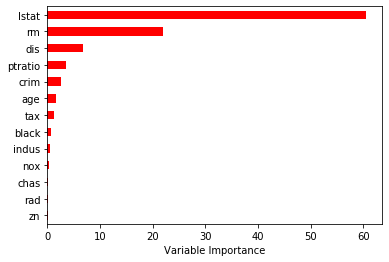

In [16]:
feature_importance = regr_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind = "barh", color = 'r')
plt.xlabel("Variable Importance")
plt.gca().legend_ = None
# For huge data Boosting is much better 

In [17]:
y_pred = regr_boost.predict(X_test)
mean_squared_error(y_pred, y_test)

16.97068353753509

In [0]:
social_media = pd.read_csv("/content/Social_Network_Ads.csv")
social_media.head()
features = ["User ID", "Gender", "Age", "EstimatedSalary"]
target = ["Purchased"]
social_media["User ID"] = social_media["User ID"].apply(lambda x : str(x)).apply(lambda x : x[0:3] )
X = pd.get_dummies(social_media[features])
y = social_media[target]
X[["Age", "EstimatedSalary"]]= scale(X[["Age", "EstimatedSalary"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state = 123)


In [36]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100) 
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

1.0


In [33]:
y_pred = clf_gini.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       174
           1       0.84      0.80      0.82       106

    accuracy                           0.87       280
   macro avg       0.86      0.85      0.86       280
weighted avg       0.87      0.87      0.87       280



In [44]:

clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=10, min_samples_split=2) 
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
max_depth = [ 3, 10, 9, 8, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 1, 3] ; min_samples_split = [4, 6, 3, 2, 3, 4, 5, 6, 7, 8, 9, 10, 5, 6, 4]
for depth, split in zip(max_depth, min_samples_split):
  clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=depth, min_samples_split=split) 
  clf_gini.fit(X_train, y_train)
  y_pred = clf_gini.predict(X_test)
  print( f"depth: {depth}, split: {split} : {accuracy_score(y_pred, y_test)}" )

depth: 3, split: 4 : 0.9
depth: 10, split: 6 : 0.8821428571428571
depth: 9, split: 3 : 0.8607142857142858
depth: 8, split: 2 : 0.8714285714285714
depth: 8, split: 3 : 0.8607142857142858
depth: 1, split: 4 : 0.775
depth: 2, split: 5 : 0.9035714285714286
depth: 3, split: 6 : 0.9035714285714286
depth: 4, split: 7 : 0.8892857142857142
depth: 5, split: 8 : 0.8928571428571429
depth: 6, split: 9 : 0.8928571428571429
depth: 7, split: 10 : 0.8928571428571429
depth: 8, split: 5 : 0.875
depth: 9, split: 6 : 0.8821428571428571
depth: 10, split: 4 : 0.8714285714285714


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       166
           1       0.93      0.82      0.87       114

    accuracy                           0.90       280
   macro avg       0.91      0.89      0.90       280
weighted avg       0.91      0.90      0.90       280



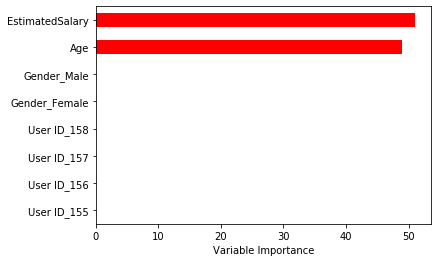

In [48]:
# depth = 2 and split 5 gives a fairly good result 
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=2, min_samples_split=5) 
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)
feature_importance = clf_gini.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind = "barh", color = 'r')
plt.xlabel("Variable Importance")
plt.gca().legend_ = None